In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import PIL.Image

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        return dict

In [8]:
def read_as_pd(batch):
    pd_data = pd.DataFrame([{
        'data': batch[b'data'][i],
        'filename': batch[b'filenames'][i],
        'labels': batch[b'labels'][i]
    } for i in range(len(batch[b'data']))], columns=['filename', 'data', 'labels'])
    
    return pd_data

In [20]:
def visualize(batch, id):
    img_flat = batch['data'][id]

    img_R = img_flat[0:1024].reshape((32, 32))
    img_G = img_flat[1024:2048].reshape((32, 32))
    img_B = img_flat[2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))

    plt.title('label: ' + str(batch['labels'][id]))
    plt.imshow(img)

In [10]:
raw_batch1 = unpickle('./data/cifar10/data_batch_1')
batch1 = read_as_pd(raw_batch1)

In [18]:
batch1.head(10)

,filename,data,labels
0,b'leptodactylus_pentadactylus_s_000004.png',"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",6
1,b'camion_s_000148.png',"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",9
2,b'tipper_truck_s_001250.png',"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",9
3,b'american_elk_s_001521.png',"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",4
4,b'station_wagon_s_000293.png',"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",1
5,b'coupe_s_001735.png',"[159, 150, 153, 154, 138, 184, 154, 77, 61, 64...",1
6,b'cassowary_s_001300.png',"[164, 105, 118, 129, 134, 146, 166, 183, 199, ...",2
7,b'cow_pony_s_001168.png',"[28, 30, 33, 62, 63, 31, 29, 42, 55, 67, 92, 7...",7
8,b'sea_boat_s_001584.png',"[134, 131, 128, 133, 139, 140, 134, 121, 124, ...",8
9,b'tabby_s_001355.png',"[125, 110, 102, 106, 106, 141, 175, 175, 148, ...",3


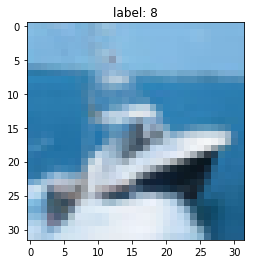

In [21]:
visualize(batch1, 8)

In [141]:
def l1_dist(im1, im2):
    return (im1 - im2).sum()

In [139]:
class KNN:
    def __init__(self, k=1):
        self.k = k
        self.X = None
        self.y = None
    
    def train(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, input_x):
        for x in self.X:
            pass